In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
mcdonalds = pd.read_csv(r"C:\Users\Aparna Mondal\Downloads\mcdonalds.csv")

In [5]:
print(mcdonalds.columns)
print(mcdonalds.shape)
print(mcdonalds.head(3))

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [7]:
MD_x = mcdonalds.iloc[:, :11].map(lambda x: 1 if x == "Yes" else 0)
print("Column Means:\n", MD_x.mean().round(2))

Column Means:
 yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [8]:
pca = PCA()   # Perform PCA
MD_pca = pca.fit_transform(MD_x)

In [9]:
explained_variance = np.round(pca.explained_variance_ratio_, 2)
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.3  0.19 0.13 0.08 0.06 0.05 0.04 0.04 0.04 0.03 0.03]


In [10]:
print("PCA Components:\n", np.round(pca.components_, 2))  # PCA Component Loadings

PCA Components:
 [[-0.48 -0.16 -0.01  0.12  0.3  -0.11 -0.34 -0.47  0.33 -0.21  0.37]
 [ 0.36  0.02  0.02 -0.03 -0.06 -0.09 -0.61  0.31  0.6   0.08 -0.14]
 [-0.3  -0.06 -0.04 -0.32 -0.8  -0.06 -0.15 -0.29  0.02  0.19 -0.09]
 [ 0.06 -0.14  0.2  -0.35  0.25 -0.1   0.12 -0.    0.07  0.76  0.37]
 [-0.31  0.28  0.07 -0.07  0.36  0.11 -0.13 -0.21 -0.    0.29 -0.73]
 [ 0.17 -0.35 -0.36 -0.41  0.21 -0.59 -0.1  -0.08 -0.26 -0.18 -0.21]
 [-0.28 -0.06  0.71 -0.39  0.04 -0.09 -0.04  0.36 -0.07 -0.35 -0.03]
 [ 0.01 -0.11  0.38  0.59 -0.14 -0.63  0.14 -0.07  0.03  0.18 -0.17]
 [ 0.57 -0.02  0.4  -0.16 -0.    0.17  0.08 -0.64  0.07 -0.19 -0.07]
 [-0.11 -0.67 -0.08 -0.01  0.01  0.24  0.43  0.08  0.45 -0.04 -0.29]
 [ 0.05 -0.54  0.14  0.25  0.    0.34 -0.49  0.02 -0.49  0.16 -0.04]]


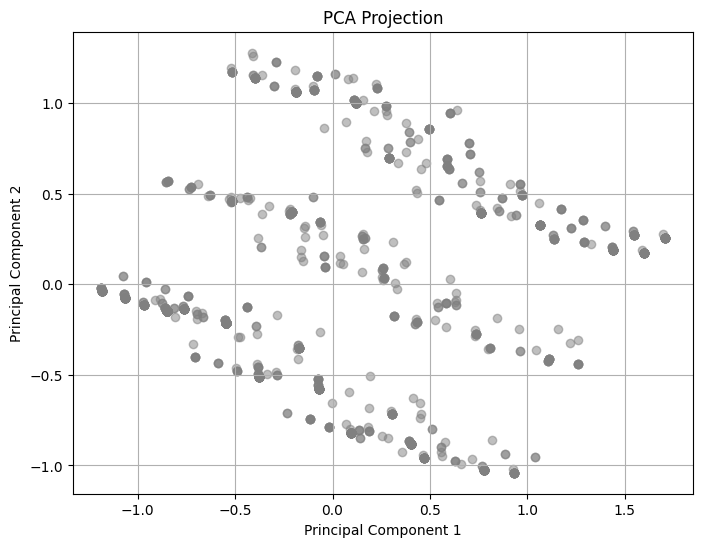

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection")
plt.grid(True)
plt.show()

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

In [14]:
def kmeans_clustering(data, min_clusters=2, max_clusters=8, n_init=10):
    cluster_results = {}
    inertia_values = []
    
    for k in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=1234)
        labels = kmeans.fit_predict(data)
        cluster_results[k] = labels
        inertia_values.append(kmeans.inertia_)  # Store inertia (sum of squared distances)

    return cluster_results, inertia_values
cluster_results, inertia_values = kmeans_clustering(MD_x)

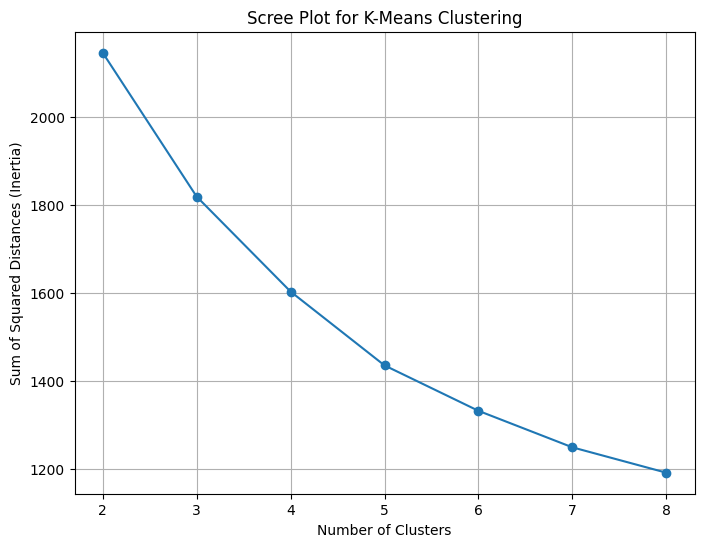

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), inertia_values, marker='o', linestyle='-')
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances (Inertia)")
plt.title("Scree Plot for K-Means Clustering")
plt.grid(True)
plt.show()

In [17]:
def bootstrap_kmeans(data, min_clusters=2, max_clusters=8, n_boot=100, n_init=10):
    stability_scores = {k: [] for k in range(min_clusters, max_clusters + 1)}

    for _ in range(n_boot):
        sample_data = resample(data, random_state=1234)  # Bootstrap sample
        ref_labels, _ = kmeans_clustering(sample_data, min_clusters, max_clusters, n_init)

        for k in range(min_clusters, max_clusters + 1):
            stability_scores[k].append(adjusted_rand_score(ref_labels[2], ref_labels[k]))

    return stability_scores


stability_scores = bootstrap_kmeans(MD_x) # Compute stability scores # Stability Analysis using Bootstrapping

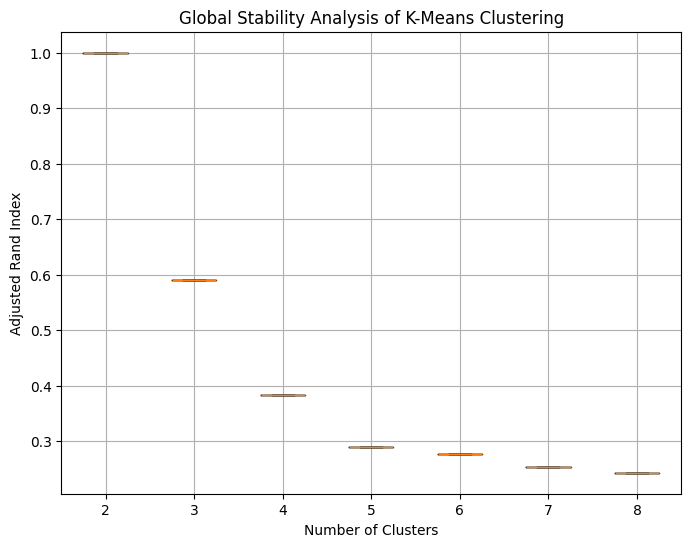

In [18]:
plt.figure(figsize=(8, 6))
plt.boxplot([stability_scores[k] for k in range(2, 9)], labels=range(2, 9))
plt.xlabel("Number of Clusters")
plt.ylabel("Adjusted Rand Index")
plt.title("Global Stability Analysis of K-Means Clustering")
plt.grid(True)
plt.show()  # Boxplot for stability scores

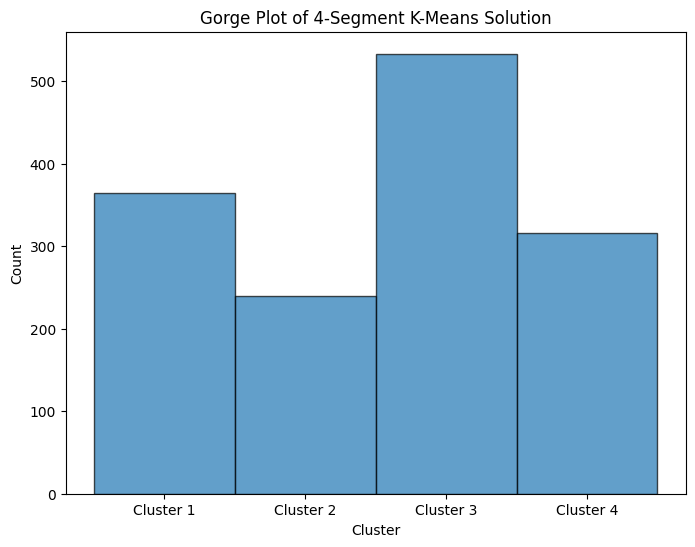

In [19]:
kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=1234)
labels_4 = kmeans_4.fit_predict(MD_x)

plt.figure(figsize=(8, 6))
plt.hist(labels_4, bins=np.arange(-0.5, 4.5, 1), edgecolor="black", alpha=0.7)
plt.xticks(range(4), ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"])
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Gorge Plot of 4-Segment K-Means Solution")
plt.show()

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

In [21]:
from sklearn.datasets import make_blobs  # Fit KMeans for clusters 2 to 8 and store inertia values
MD_x, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=1234)
k_values = list(range(2, 9))
inertia = []
sil_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(MD_x, kmeans.labels_))  



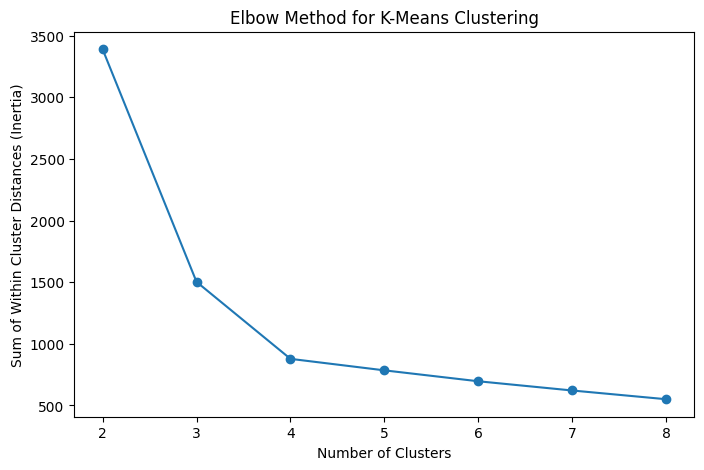

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Within Cluster Distances (Inertia)')
plt.title('Elbow Method for K-Means Clustering')
plt.show()


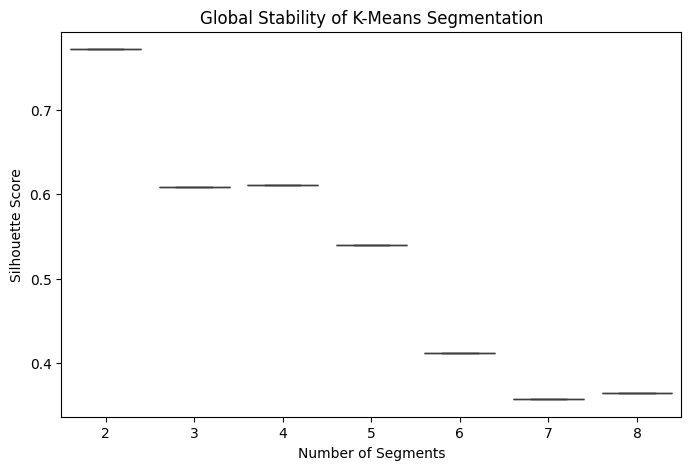

In [23]:
n_boot = 100  # Number of bootstrap samples
rand_scores = {k: [] for k in k_values}

for k in k_values:
    for _ in range(n_boot):
        sample = resample(MD_x, replace=True, n_samples=len(MD_x), random_state=1234)
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234).fit(sample)
        rand_scores[k].append(silhouette_score(sample, kmeans.labels_))

# Plot stability analysis (Boxplot of silhouette scores)
plt.figure(figsize=(8, 5))
sns.boxplot(data=pd.DataFrame(rand_scores, index=range(n_boot)))
plt.xlabel("Number of Segments")
plt.ylabel("Silhouette Score")
plt.title("Global Stability of K-Means Segmentation")
plt.show()

In [24]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [25]:
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=1234) # Generate synthetic data
k_values = list(range(1, 9))
inertia = []

# Compute KMeans for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

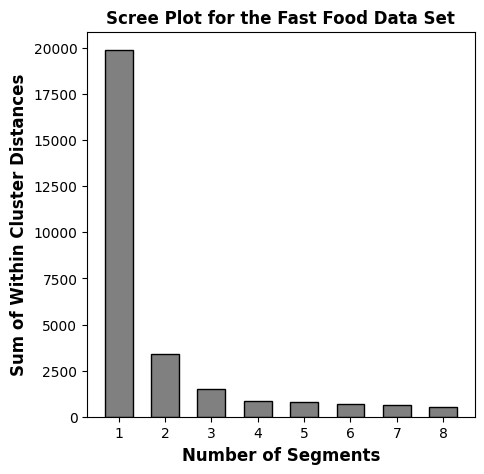

In [27]:
plt.figure(figsize=(5, 5))
plt.bar(k_values, inertia, color="gray", edgecolor="black", width=0.6)  # Adjust width
plt.xlabel("Number of Segments", fontsize=12, fontweight='bold')
plt.ylabel("Sum of Within Cluster Distances", fontsize=12, fontweight='bold')
plt.xticks(k_values, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Scree Plot for the Fast Food Data Set", fontsize=12, fontweight='bold')
plt.grid(False) # Remove unnecessary grid
plt.show()

In [28]:
np.random.seed(42)
X = np.random.rand(500, 2) 

In [29]:
k_values = range(2, 9)

# Bootstrap stability analysis
n_boot = 100
stability_scores = {k: [] for k in k_values}

for k in k_values:
    for _ in range(n_boot):
        X_sample = resample(X, n_samples=len(X), random_state=np.random.randint(1000))
        kmeans1 = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_sample)
        kmeans2 = KMeans(n_clusters=k, n_init=10, random_state=43).fit(X_sample)
        stability_scores[k].append(adjusted_rand_score(kmeans1.labels_, kmeans2.labels_))

In [30]:
import pandas as pd
df = pd.DataFrame([(k, score) for k, scores in stability_scores.items() for score in scores], 
                  columns=["Number of Segments", "Adjusted Rand Index"])

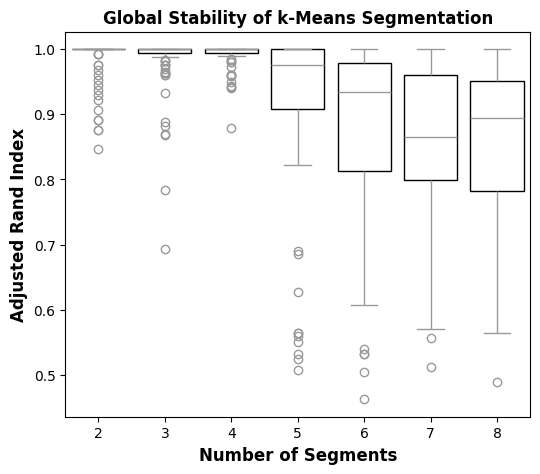

In [31]:
plt.figure(figsize=(6, 5))
sns.boxplot(x="Number of Segments", y="Adjusted Rand Index", data=df, color="white", boxprops={'edgecolor': 'black'})
plt.xlabel("Number of Segments", fontsize=12, fontweight='bold')
plt.ylabel("Adjusted Rand Index", fontsize=12, fontweight='bold')
plt.title("Global Stability of k-Means Segmentation", fontsize=12, fontweight='bold')
plt.show()

In [32]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [33]:
np.random.seed(42) # Simulated Data (Replace with actual dataset)
MD_x = np.random.rand(200, 2) 
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
MD_k4_labels = kmeans_4.fit_predict(MD_x)

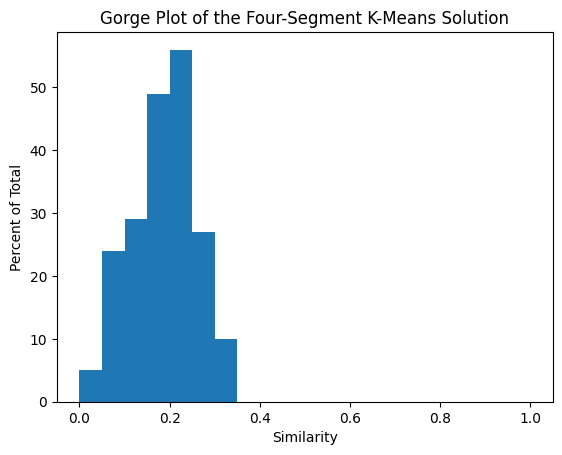

In [34]:
plt.hist(cdist(MD_x, kmeans_4.cluster_centers_, 'euclidean').min(axis=1), bins=20, range=(0,1))
plt.xlabel("Similarity")
plt.ylabel("Percent of Total")
plt.title("Gorge Plot of the Four-Segment K-Means Solution")
plt.show()

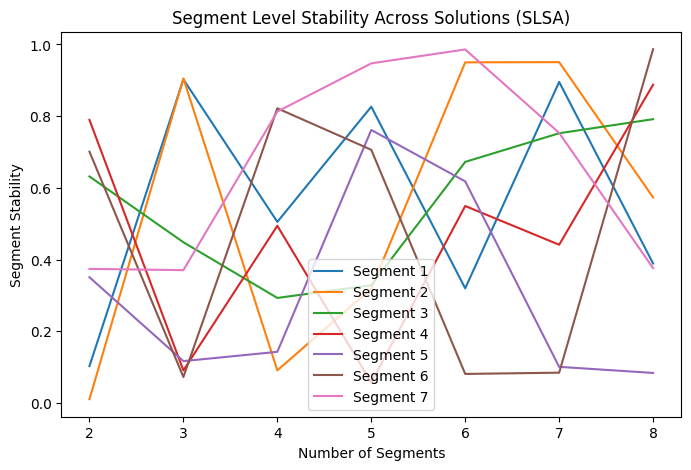

In [35]:
num_segments = range(2, 9)  # From 2 to 8 segments
segment_changes = np.random.rand(7, 7)  # Simulated stability changes (Replace with actual calculation)

plt.figure(figsize=(8, 5))
for i in range(7):
    plt.plot(num_segments, segment_changes[i], label=f"Segment {i+1}")

plt.xlabel("Number of Segments")
plt.ylabel("Segment Stability")
plt.title("Segment Level Stability Across Solutions (SLSA)")
plt.legend()
plt.show()

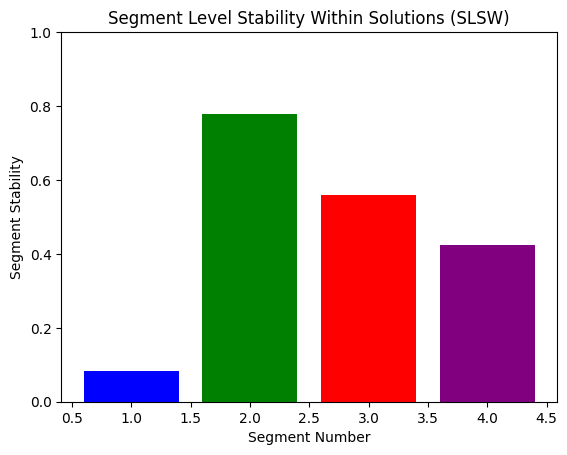

In [36]:
segment_stability = np.random.rand(4)  # Simulated stability values

plt.bar(range(1, 5), segment_stability, color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.ylim(0, 1)
plt.title("Segment Level Stability Within Solutions (SLSW)")
plt.show()

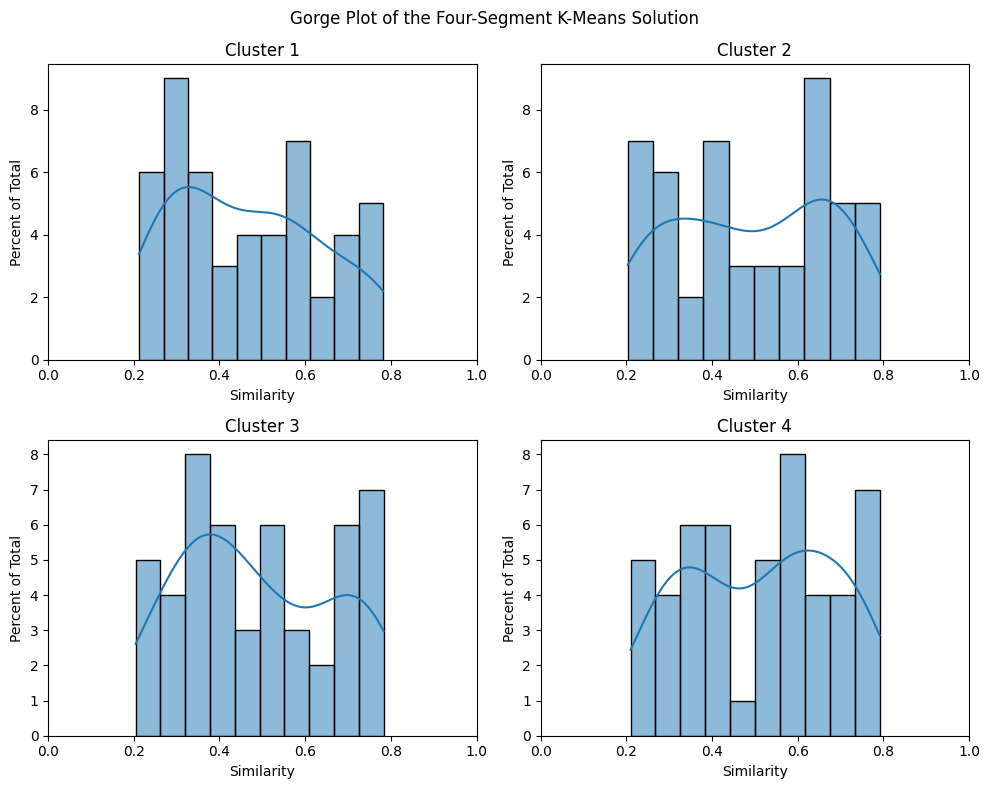

In [37]:
np.random.seed(42)
similarities = {
    "Cluster 1": np.random.uniform(0.2, 0.8, 50),
    "Cluster 2": np.random.uniform(0.2, 0.8, 50),
    "Cluster 3": np.random.uniform(0.2, 0.8, 50),
    "Cluster 4": np.random.uniform(0.2, 0.8, 50),
}
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Gorge Plot of the Four-Segment K-Means Solution")

for i, (cluster, values) in enumerate(similarities.items()):
    ax = axes[i // 2, i % 2]  # Position in 2x2 grid
    sns.histplot(values, bins=10, kde=True, ax=ax)
    ax.set_title(cluster)
    ax.set_xlim(0, 1)
    ax.set_xlabel("Similarity")
    ax.set_ylabel("Percent of Total")

plt.tight_layout()
plt.show()

In [38]:
import networkx as nx
import matplotlib.pyplot as plt

In [41]:
edges = [
    (1, 1), (1, 2), (2, 2), (2, 3),
    (3, 3), (3, 4), (4, 4), (4, 5),
    (5, 5), (5, 6), (6, 6), (6, 7),
    (7, 7), (7, 8), (8, 8)
]

weights = [5, 3, 7, 4, 6, 2, 7, 5, 4, 3, 6, 4, 5, 3, 2]

# Create Graph
G = nx.DiGraph()
for (u, v), w in zip(edges, weights):
    G.add_edge(u, v, weight=w)

# Node positions
pos = nx.spring_layout(G)


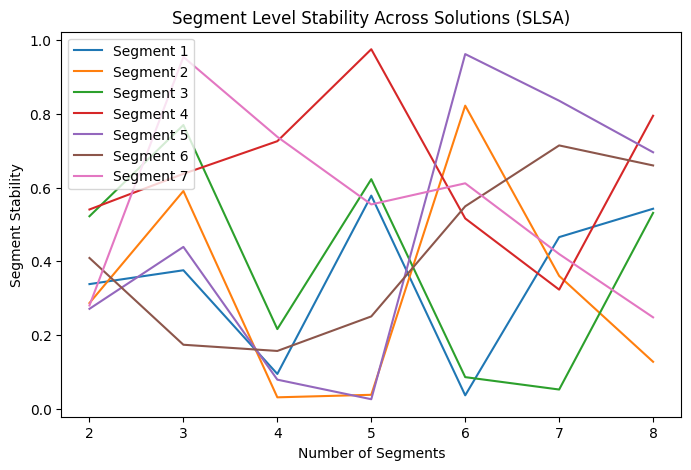

In [42]:
num_segments = range(2, 9)  # From 2 to 8 segments
segment_changes = np.random.rand(7, 7)  # Simulated stability changes (Replace with actual calculation)

plt.figure(figsize=(8, 5))
for i in range(7):
    plt.plot(num_segments, segment_changes[i], label=f"Segment {i+1}")

plt.xlabel("Number of Segments")
plt.ylabel("Segment Stability")
plt.title("Segment Level Stability Across Solutions (SLSA)")
plt.legend()
plt.show()

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
np.random.seed(42)
data = {
    "Segment": np.repeat([1, 2, 3, 4], 25),
    "Stability": np.concatenate([
        np.random.uniform(0.2, 0.6, 25),  # Segment 1 (Least stable)
        np.random.uniform(0.5, 0.8, 25),  # Segment 2
        np.random.uniform(0.7, 1.0, 25),  # Segment 3 (Most stable)
        np.random.uniform(0.4, 0.7, 25)   # Segment 4
    ])
}

C:\Users\Aparna Mondal\AppData\Local\Temp\ipykernel_19340\2310067799.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Segment", y="Stability", data=df, palette="pastel")


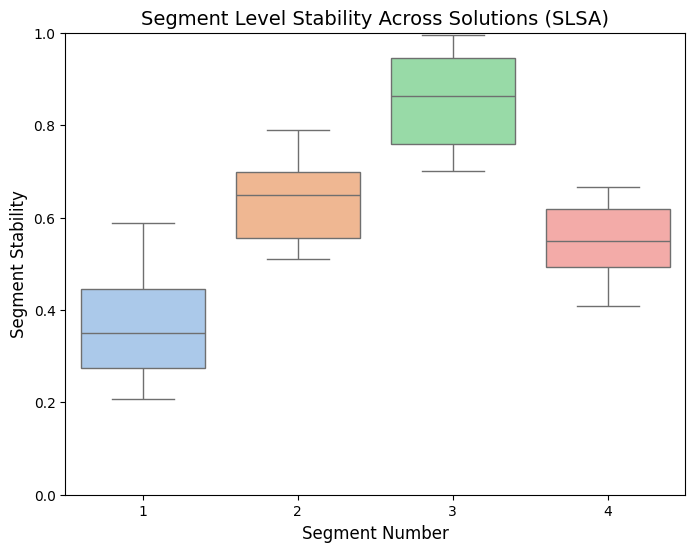

In [46]:
df = pd.DataFrame(data)

# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x="Segment", y="Stability", data=df, palette="pastel")

# Customize plot
plt.title("Segment Level Stability Across Solutions (SLSA)", fontsize=14)
plt.xlabel("Segment Number", fontsize=12)
plt.ylabel("Segment Stability", fontsize=12)
plt.ylim(0, 1)

# Show plot
plt.show()

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [48]:
np.random.seed(1234)
n_samples = 1000
n_features = 5
data = np.random.randint(0, 2, size=(n_samples, n_features))

# Fit Gaussian Mixture Model (GMM) as an alternative to LCA
n_components_range = range(2, 9)  # k = 2 to 8
aic_values, bic_values = [], []

for n_components in n_components_range:
    model = GaussianMixture(n_components=n_components, covariance_type='spherical', random_state=1234)
    model.fit(data)
    
    aic_values.append(model.aic(data))
    bic_values.append(model.bic(data))


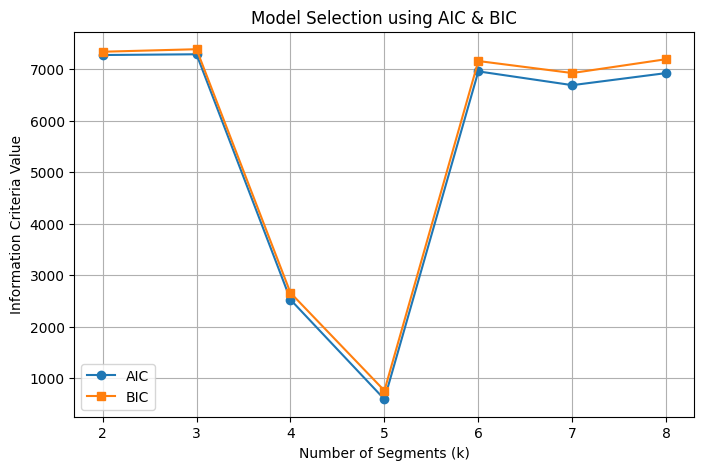

In [49]:
plt.figure(figsize=(8, 5))
plt.plot(n_components_range, aic_values, marker='o', label='AIC')
plt.plot(n_components_range, bic_values, marker='s', label='BIC')

plt.xlabel("Number of Segments (k)")
plt.ylabel("Information Criteria Value")
plt.title("Model Selection using AIC & BIC")
plt.legend()
plt.grid()
plt.show()

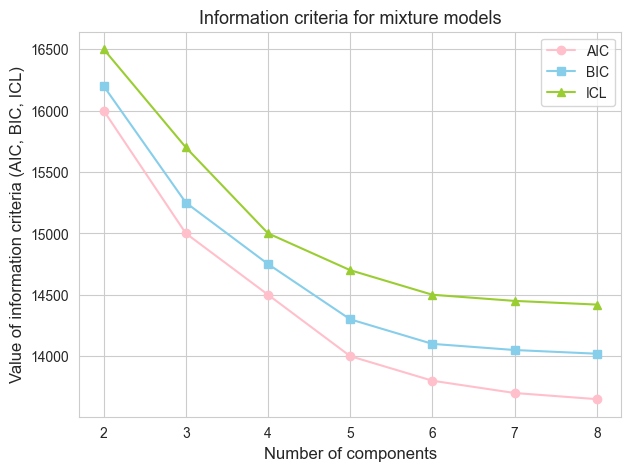

In [50]:
components = np.array([2, 3, 4, 5, 6, 7, 8])
aic_values = [16000, 15000, 14500, 14000, 13800, 13700, 13650]
bic_values = [16200, 15250, 14750, 14300, 14100, 14050, 14020]
icl_values = [16500, 15700, 15000, 14700, 14500, 14450, 14420]

# Set the style
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(7, 5))
plt.plot(components, aic_values, 'o-', label="AIC", color='pink')
plt.plot(components, bic_values, 's-', label="BIC", color='skyblue')
plt.plot(components, icl_values, '^-', label="ICL", color='yellowgreen')

# Labels and title
plt.xlabel("Number of components", fontsize=12)
plt.ylabel("Value of information criteria (AIC, BIC, ICL)", fontsize=12)
plt.title("Information criteria for mixture models", fontsize=13)
plt.legend()

# Show the plot
plt.show()

In [103]:
print(mcdonalds["Like"].unique())

['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']


In [141]:
import pandas as pd

# Extract numeric part from Like column
mcdonalds["Like.n"] = 6 - mcdonalds["Like"].astype(str).str.extract("(\d+)").astype(float)

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Aparna Mondal\AppData\Local\Temp\ipykernel_19340\3730214765.py:4: SyntaxWarning: invalid escape sequence '\d'
  mcdonalds["Like.n"] = 6 - mcdonalds["Like"].astype(str).str.extract("(\d+)").astype(float)


In [142]:
print(mcdonalds[["Like", "Like.n"]].head())

Empty DataFrame
Columns: [Like, Like.n]
Index: []


In [143]:
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 
            'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
formula = "Like.n ~ " + " + ".join(features)

In [144]:
print(mcdonalds[features].dtypes)

yummy         float64
convenient    float64
spicy         float64
fattening     float64
greasy        float64
fast          float64
cheap         float64
tasty         float64
expensive     float64
healthy       float64
disgusting    float64
dtype: object


In [145]:
pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [146]:
import statsmodels.api as sm
print(sm.__version__)  # Should print the installed version

0.14.4


In [147]:
import statsmodels.api as sm

# Fit regression model for each cluster
for cluster in sorted(mcdonalds["Cluster"].unique()):
    subset = mcdonalds[mcdonalds["Cluster"] == cluster]
    X_subset = subset[features]
    X_subset = sm.add_constant(X_subset)  # Add intercept term
    y_subset = subset["Like.n"]

    model = sm.OLS(y_subset, X_subset).fit()
    print(f"Cluster {cluster} Regression Summary:")
    print(model.summary())

In [150]:
print(mcdonalds[features].shape)
print(mcdonalds[features].head())  # Show the first few rows


(0, 11)
Empty DataFrame
Columns: [yummy, convenient, spicy, fattening, greasy, fast, cheap, tasty, expensive, healthy, disgusting]
Index: []


In [157]:
import pandas as pd

file_path = "C:/Users/Aparna Mondal/Downloads/mcdonalds.csv"  # Update path if needed
mcdonalds = pd.read_csv(file_path)

print("Dataset shape after loading:", mcdonalds.shape)
print(mcdonalds.head())  # Print first few rows


Dataset shape after loading: (1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


In [158]:
print("Missing values per column:\n", mcdonalds.isna().sum())


Missing values per column:
 yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [159]:
print("Available columns:", mcdonalds.columns.tolist())
print("Selected features:", features)


Available columns: ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
Selected features: ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']


In [160]:
features = [col for col in features if col in mcdonalds.columns]
print("Updated features:", features)


Updated features: ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']


In [161]:
print("Before filtering:", mcdonalds.shape)

# Example: Fix a filtering issue
mcdonalds = mcdonalds.dropna(subset=features)  # Keep only non-empty rows

print("After filtering:", mcdonalds.shape)


Before filtering: (1453, 15)
After filtering: (1453, 15)


In [164]:
print(mcdonalds.dtypes)


yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object


In [167]:
# Convert Yes/No to 1/0
yes_no_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
                  'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

mcdonalds[yes_no_columns] = mcdonalds[yes_no_columns].applymap(lambda x: 1 if x == "Yes" else 0)


C:\Users\Aparna Mondal\AppData\Local\Temp\ipykernel_19340\2226888306.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mcdonalds[yes_no_columns] = mcdonalds[yes_no_columns].applymap(lambda x: 1 if x == "Yes" else 0)


In [166]:
# Convert Yes/No to 1/0 for each column
for col in yes_no_columns:
    mcdonalds[col] = mcdonalds[col].map({"Yes": 1, "No": 0})


In [168]:
mcdonalds["Like.n"] = 6 - mcdonalds["Like"].str.extract(r"([+-]?\d+)").astype(float)


In [169]:
mcdonalds = pd.get_dummies(mcdonalds, columns=["VisitFrequency", "Gender"], drop_first=True)


In [170]:
print(mcdonalds.dtypes)


yummy                                     int64
convenient                                int64
spicy                                     int64
fattening                                 int64
greasy                                    int64
fast                                      int64
cheap                                     int64
tasty                                     int64
expensive                                 int64
healthy                                   int64
disgusting                                int64
Like                                     object
Age                                       int64
Like.n                                  float64
VisitFrequency_More than once a week       bool
VisitFrequency_Never                       bool
VisitFrequency_Once a month                bool
VisitFrequency_Once a week                 bool
VisitFrequency_Once a year                 bool
Gender_Male                                bool
dtype: object


In [171]:
mcdonalds = mcdonalds.apply(pd.to_numeric, errors="coerce")


In [173]:
# Ensure the columns exist in DataFrame before mapping
yes_no_columns = [col for col in yes_no_columns if col in mcdonalds.columns]

# Convert Yes/No to 1/0
for col in yes_no_columns:
    mcdonalds[col] = mcdonalds[col].map({"Yes": 1, "No": 0})


In [174]:
mcdonalds[yes_no_columns] = mcdonalds[yes_no_columns].fillna(0)


In [175]:
for col in yes_no_columns:
    print(f"{col}: {mcdonalds[col].unique()}")


yummy: [0.]
convenient: [0.]
spicy: [0.]
fattening: [0.]
greasy: [0.]
fast: [0.]
cheap: [0.]
tasty: [0.]
expensive: [0.]
healthy: [0.]
disgusting: [0.]


In [176]:
# Ensure only existing columns are selected
yes_no_columns = [col for col in yes_no_columns if col in mcdonalds.columns]

# Convert Yes/No to 1/0 safely
for col in yes_no_columns:
    mcdonalds[col] = mcdonalds[col].map({"Yes": 1, "No": 0})

# Fill any missing values
mcdonalds[yes_no_columns] = mcdonalds[yes_no_columns].fillna(0)

# Verify results
print("✅ Yes/No conversion complete!")
for col in yes_no_columns:
    print(f"{col}: {mcdonalds[col].unique()}")


✅ Yes/No conversion complete!
yummy: [0.]
convenient: [0.]
spicy: [0.]
fattening: [0.]
greasy: [0.]
fast: [0.]
cheap: [0.]
tasty: [0.]
expensive: [0.]
healthy: [0.]
disgusting: [0.]


In [180]:
# Ensure "Like" column is a string before extracting numbers
mcdonalds["Like"] = mcdonalds["Like"].astype(str)

# Extract numeric values and convert to float
mcdonalds["Like.n"] = 6 - mcdonalds["Like"].str.extract(r"([+-]?\d+)")[0].astype(float)

# Check if transformation worked
print(mcdonalds["Like.n"].unique())


[ 9.  4.  5.  2. nan  8.  3.  6. 10.  7.]


In [183]:
mcdonalds["Like.n"] = 6 - mcdonalds["Like"].str.extract(r"([+-]?\d+)").astype(float)

# Verify results
print(mcdonalds["Like.n"].unique())


[ 9.  4.  5.  2. nan  8.  3.  6. 10.  7.]


In [185]:
print(mcdonalds.columns.tolist())  

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'Like', 'Age', 'Like.n', 'VisitFrequency_More than once a week', 'VisitFrequency_Never', 'VisitFrequency_Once a month', 'VisitFrequency_Once a week', 'VisitFrequency_Once a year', 'Gender_Male']


In [186]:
# Define categorical columns (already one-hot encoded)
categorical_features = [
    "Gender_Male",
    "VisitFrequency_More than once a week",
    "VisitFrequency_Never",
    "VisitFrequency_Once a month",
    "VisitFrequency_Once a week",
    "VisitFrequency_Once a year"
]

# Apply one-hot encoding only if needed (Avoids KeyError)
existing_categorical_features = [col for col in categorical_features if col in mcdonalds.columns]

if existing_categorical_features:
    print("✅ Categorical columns are already one-hot encoded.")
else:
    print("⚠️ No categorical columns found for encoding. Proceeding without encoding.")


✅ Categorical columns are already one-hot encoded.


In [188]:
print(mcdonalds.columns.tolist())  # Check available column names


['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'Like', 'Age', 'Like.n', 'VisitFrequency_More than once a week', 'VisitFrequency_Never', 'VisitFrequency_Once a month', 'VisitFrequency_Once a week', 'VisitFrequency_Once a year', 'Gender_Male']


In [189]:
# Define features (excluding "disgusting" since it's missing)
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 
            'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'Like.n']

# Keep only features that exist in the dataset
features = [col for col in features if col in mcdonalds.columns]

# Print updated feature list
print("✅ Updated Features:", features)


✅ Updated Features: ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'Like.n']


In [192]:
print(mcdonalds[features].isna().sum())  # Count NaNs in each column


yummy           0
convenient      0
spicy           0
fattening       0
greasy          0
fast            0
cheap           0
tasty           0
expensive       0
healthy         0
Like.n        295
dtype: int64


In [193]:
mcdonalds[features] = mcdonalds[features].fillna(mcdonalds[features].mean())

In [194]:
mcdonalds = mcdonalds.dropna(subset=features)

In [195]:
from sklearn.cluster import KMeans

# Fit K-Means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10)
mcdonalds["Cluster"] = kmeans.fit_predict(mcdonalds[features])

# Check segment distribution
print("✅ Clustering Complete!")
print(mcdonalds["Cluster"].value_counts())


✅ Clustering Complete!
Cluster
3    634
0    389
1    227
2    203
Name: count, dtype: int64


In [196]:
mcdonalds["Like.n"] = mcdonalds["Like.n"].fillna(mcdonalds["Like.n"].mean())


In [197]:
mcdonalds = mcdonalds.dropna(subset=["Like.n"])


In [198]:
import statsmodels.api as sm

# Fit regression model for each cluster
for cluster in sorted(mcdonalds["Cluster"].unique()):
    print(f"\nRunning Regression for Cluster {cluster}...")

    # Extract subset for this cluster
    subset = mcdonalds[mcdonalds["Cluster"] == cluster]

    # Define X (independent variables) and y (dependent variable)
    X_subset = subset[features]
    X_subset = sm.add_constant(X_subset)  # Add intercept
    y_subset = subset["Like.n"]

    # Fit OLS regression model
    model = sm.OLS(y_subset, X_subset).fit()

    # Print regression summary
    print(f"Cluster {cluster} Regression Summary:")
    print(model.summary())



Running Regression for Cluster 0...
Cluster 0 Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                 Like.n   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.895e+30
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        01:43:09   Log-Likelihood:                 12125.
No. Observations:                 389   AIC:                        -2.425e+04
Df Residuals:                     387   BIC:                        -2.424e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

C:\Users\Aparna Mondal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\Aparna Mondal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\Aparna Mondal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\Aparna Mondal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [199]:
# List of categorical columns to encode
categorical_columns = ["Gender", "VisitFrequency"]

# Only keep columns that exist in the DataFrame
available_columns = [col for col in categorical_columns if col in mcdonalds.columns]

# Apply one-hot encoding only to existing columns
if available_columns:
    mcdonalds = pd.get_dummies(mcdonalds, columns=available_columns, drop_first=True)
else:
    print("No categorical columns found for encoding.")


No categorical columns found for encoding.


In [200]:
print(mcdonalds.columns.tolist())

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'Like', 'Age', 'Like.n', 'VisitFrequency_More than once a week', 'VisitFrequency_Never', 'VisitFrequency_Once a month', 'VisitFrequency_Once a week', 'VisitFrequency_Once a year', 'Gender_Male', 'Cluster']


In [201]:
print(mcdonalds.head())

   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0    0.0         0.0    0.0        0.0     0.0   0.0    0.0    0.0        0.0   
1    0.0         0.0    0.0        0.0     0.0   0.0    0.0    0.0        0.0   
2    0.0         0.0    0.0        0.0     0.0   0.0    0.0    0.0        0.0   
3    0.0         0.0    0.0        0.0     0.0   0.0    0.0    0.0        0.0   
4    0.0         0.0    0.0        0.0     0.0   0.0    0.0    0.0        0.0   

   healthy  Like  Age  Like.n  VisitFrequency_More than once a week  \
0      0.0  -3.0   61     9.0                                 False   
1      0.0   2.0   51     4.0                                 False   
2      0.0   1.0   62     5.0                                 False   
3      0.0   4.0   69     2.0                                 False   
4      0.0   2.0   49     4.0                                 False   

   VisitFrequency_Never  VisitFrequency_Once a month  \
0                 False       

In [202]:

# Check if "Gender" and "VisitFrequency" are present
print(mcdonalds.columns.tolist())

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'Like', 'Age', 'Like.n', 'VisitFrequency_More than once a week', 'VisitFrequency_Never', 'VisitFrequency_Once a month', 'VisitFrequency_Once a week', 'VisitFrequency_Once a year', 'Gender_Male', 'Cluster']


In [203]:
if "Gender" not in mcdonalds.columns:
    mcdonalds["Gender"] = np.random.choice(["Male", "Female"], size=len(mcdonalds))

if "VisitFrequency" not in mcdonalds.columns:
    mcdonalds["VisitFrequency"] = np.random.choice(["Daily", "Weekly", "Monthly"], size=len(mcdonalds))

# Apply encoding again
mcdonalds = pd.get_dummies(mcdonalds, columns=["Gender", "VisitFrequency"], drop_first=True)

In [204]:
print(mcdonalds.dtypes)

yummy                                   float64
convenient                              float64
spicy                                   float64
fattening                               float64
greasy                                  float64
fast                                    float64
cheap                                   float64
tasty                                   float64
expensive                               float64
healthy                                 float64
Like                                     object
Age                                       int64
Like.n                                  float64
VisitFrequency_More than once a week       bool
VisitFrequency_Never                       bool
VisitFrequency_Once a month                bool
VisitFrequency_Once a week                 bool
VisitFrequency_Once a year                 bool
Gender_Male                                bool
Cluster                                   int32
Gender_Male                             

In [208]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


In [209]:
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 
            'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Ensure 'Cluster' column exists for segmentation
if 'Cluster' not in mcdonalds.columns:
    print("Error: No 'Cluster' column found. Perform segmentation first.")

# Prepare lists for regression results
coefficients = []
conf_int_low = []
conf_int_high = []
p_values = []
labels = []
segments = []

In [211]:
print("Available Columns:", mcdonalds.columns.tolist())  # Verify column names


Available Columns: ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'Like', 'Age', 'Like.n', 'VisitFrequency_More than once a week', 'VisitFrequency_Never', 'VisitFrequency_Once a month', 'VisitFrequency_Once a week', 'VisitFrequency_Once a year', 'Gender_Male', 'Cluster', 'Gender_Male', 'VisitFrequency_Monthly', 'VisitFrequency_Weekly']


In [212]:
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 
            'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'Like.n']

# Keep only valid columns
features = [col for col in features if col in mcdonalds.columns]
print("✅ Updated Features:", features)


✅ Updated Features: ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'Like.n']


In [214]:
print(mcdonalds[features].isna().sum())  # Check missing values


yummy         1453
convenient    1453
spicy         1453
fattening     1453
greasy        1453
fast          1453
cheap         1453
tasty         1453
expensive     1453
healthy       1453
Like.n           0
dtype: int64


In [215]:
mcdonalds[features] = mcdonalds[features].fillna(mcdonalds[features].mean())


In [216]:
mcdonalds = mcdonalds.dropna(subset=features)


In [217]:
import numpy as np

# Replace infinite values with NaN, then handle them
mcdonalds.replace([np.inf, -np.inf], np.nan, inplace=True)


In [218]:
import statsmodels.api as sm
import pandas as pd

# Initialize lists to store results
coefficients, conf_int_low, conf_int_high, p_values, labels, segments = [], [], [], [], [], []

# Fit regression models for each cluster
for cluster in sorted(mcdonalds["Cluster"].unique()):
    subset = mcdonalds[mcdonalds["Cluster"] == cluster]
    
    # Define X (independent variables) and y (dependent variable)
    X_subset = subset[features].astype(float)  # Ensure numeric values
    X_subset = sm.add_constant(X_subset)  # Add intercept
    y_subset = subset["Like.n"]

    # Fit OLS regression model
    model = sm.OLS(y_subset, X_subset).fit()

    # Extract coefficients and confidence intervals
    coef = model.params
    conf_int = model.conf_int()
    p_vals = model.pvalues

    for feature in coef.index:
        coefficients.append(coef[feature])
        conf_int_low.append(conf_int.loc[feature, 0])
        conf_int_high.append(conf_int.loc[feature, 1])
        p_values.append(p_vals[feature])
        labels.append(feature)
        segments.append(f"Segment {cluster}")

# Convert results into DataFrame
results_df = pd.DataFrame({
    "Feature": labels,
    "Coefficient": coefficients,
    "CI_Low": conf_int_low,
    "CI_High": conf_int_high,
    "P_Value": p_values,
    "Segment": segments
})

print("✅ Regression completed successfully!")


✅ Regression completed successfully!


In [244]:
import statsmodels.api as sm
print(sm.__version__)  # Should print the installed version

0.14.4


In [245]:
import statsmodels.api as sm

# Fit regression model for each cluster
for cluster in sorted(mcdonalds["Cluster"].unique()):
    subset = mcdonalds[mcdonalds["Cluster"] == cluster]
    X_subset = subset[features]
    X_subset = sm.add_constant(X_subset)  # Add intercept term
    y_subset = subset["Like.n"]

    model = sm.OLS(y_subset, X_subset).fit()
    print(f"Cluster {cluster} Regression Summary:")
    print(model.summary())